# Banking Deposit Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d rashmiranu/banking-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification
License(s): unknown
100%|█████████████████████████████████████████| 409k/409k [00:01<00:00, 329kB/s]
100%|█████████████████████████████████████████| 409k/409k [00:01<00:00, 329kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Banking Deposit Classification/banking-dataset-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Banking Deposit Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv("new_train.csv")
df2 = pd.read_csv("new_test.csv")

In [5]:
df = pd.concat([df1, df2], ignore_index=True)

In [12]:
df = df.head(5000)

In [13]:
df.shape

(5000, 16)

In [14]:
df.size

80000

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          5000 non-null   int64  
 1   job          5000 non-null   object 
 2   marital      5000 non-null   object 
 3   education    5000 non-null   object 
 4   default      5000 non-null   object 
 5   housing      5000 non-null   object 
 6   loan         5000 non-null   object 
 7   contact      5000 non-null   object 
 8   month        5000 non-null   object 
 9   day_of_week  5000 non-null   object 
 10  duration     5000 non-null   int64  
 11  campaign     5000 non-null   int64  
 12  pdays        5000 non-null   float64
 13  previous     5000 non-null   float64
 14  poutcome     5000 non-null   object 
 15  y            5000 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 625.1+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,39.9662,10.462607,18.0,32.0,38.0,47.0,88.0
duration,5000.0,253.6520,255.976798,0.0,103.0,178.0,310.0,4918.0
campaign,5000.0,2.5580,2.788941,1.0,1.0,2.0,3.0,43.0
pdays,5000.0,965.6416,178.921081,0.0,999.0,999.0,999.0,999.0
previous,5000.0,0.1618,0.466974,0.0,0.0,0.0,0.0,6.0


In [17]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(1)

In [19]:
df.nunique()

age             71
job             12
marital          4
education        8
default          2
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       868
campaign        29
pdays           22
previous         7
poutcome         3
y                2
dtype: int64

In [21]:
df['y'].value_counts()

y
no     4480
yes     520
Name: count, dtype: int64

## Data Visualization

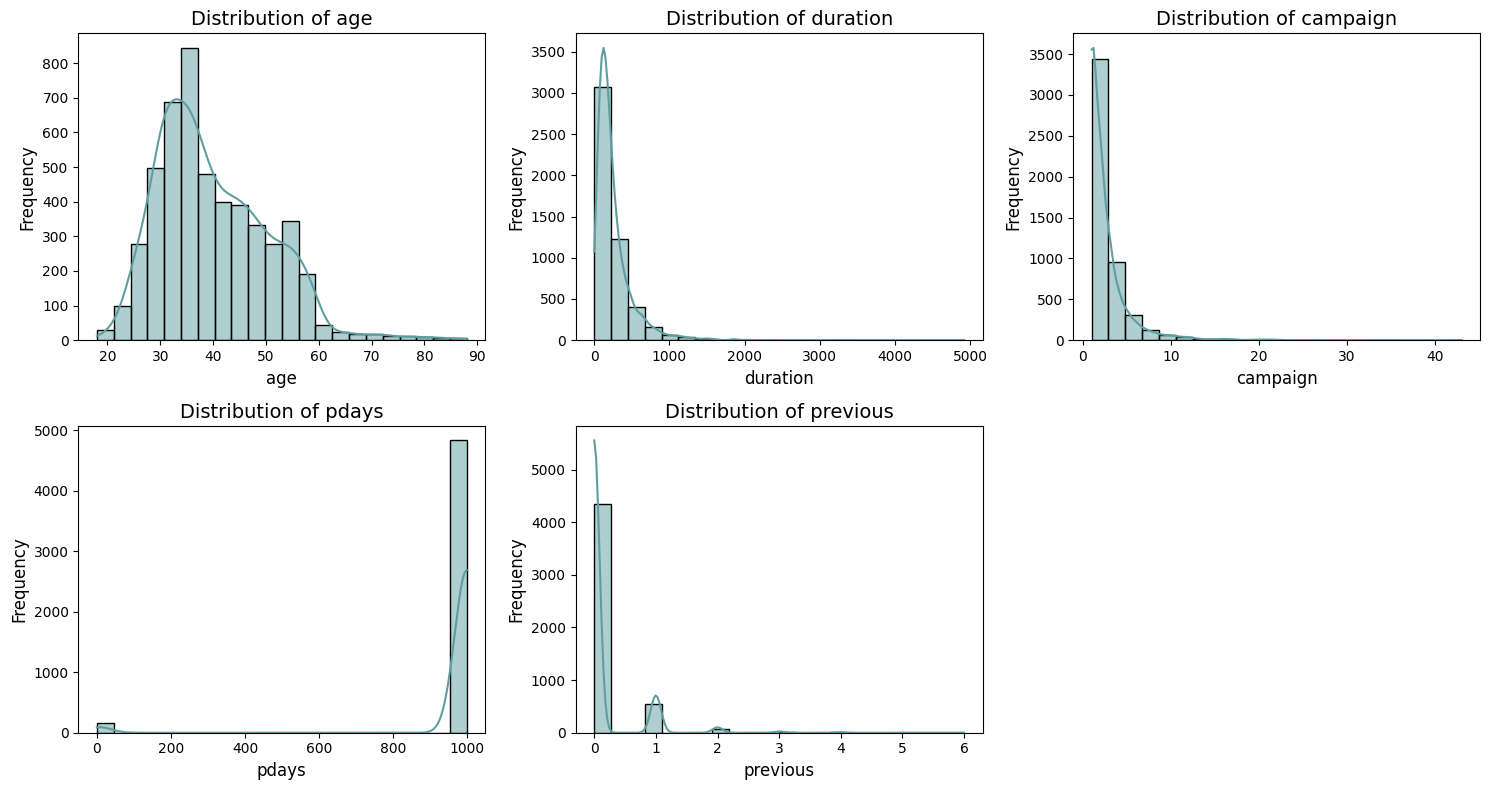

In [22]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

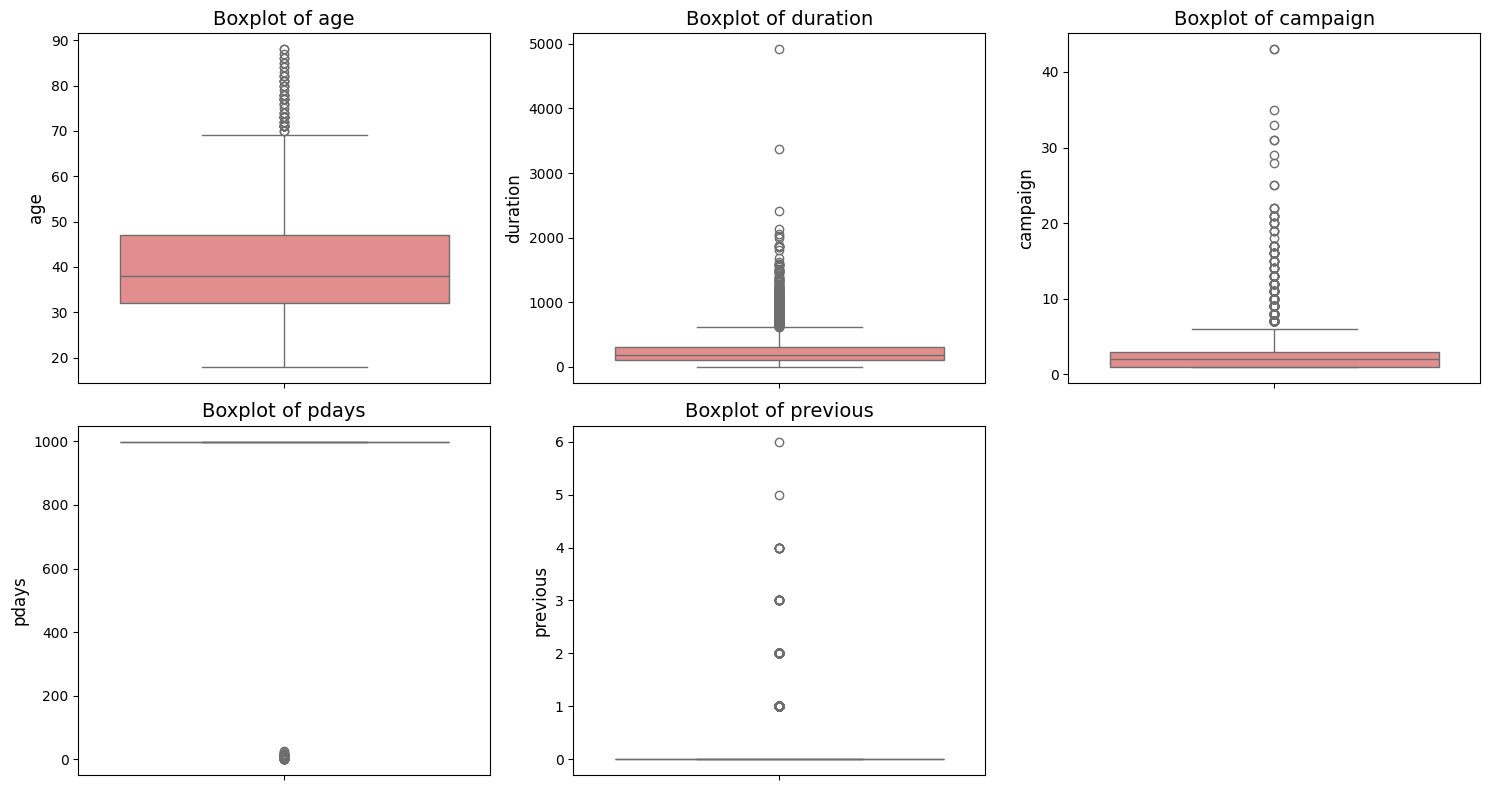

In [23]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

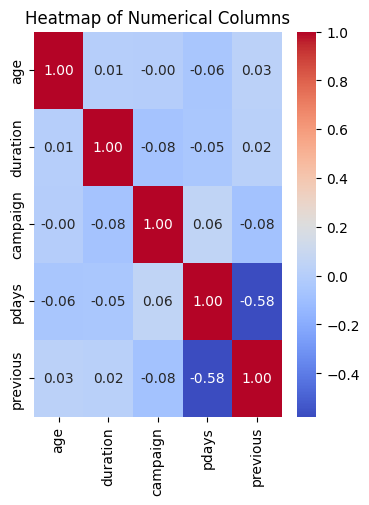

In [24]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(4,5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [25]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [26]:
X = df.drop(columns=['y'])
y = df['y']

In [27]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Smote

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Evaluation

In [29]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [31]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.815, 0.853, 0.903, 0.907, 0.851, 0.884, 0.889, 0.857, 0.776]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       900
           1       0.31      0.70      0.43       100

    accuracy                           0.81      1000
   macro avg       0.64      0.76      0.66      1000
weighted avg       0.90      0.81      0.84      1000

Confusion Matrix:
 [[745 155]
 [ 30  70]]


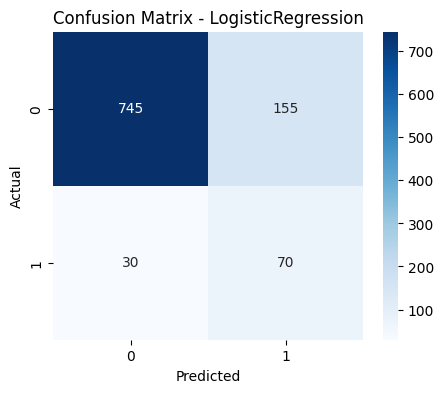

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       900
           1       0.37      0.66      0.47       100

    accuracy                           0.85      1000
   macro avg       0.66      0.77      0.69      1000
weighted avg       0.90      0.85      0.87      1000

Confusion Matrix:
 [[787 113]
 [ 34  66]]


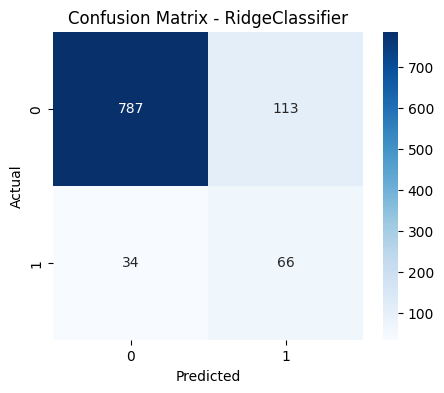

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       900
           1       0.51      0.52      0.52       100

    accuracy                           0.90      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.90      0.90      0.90      1000

Confusion Matrix:
 [[851  49]
 [ 48  52]]


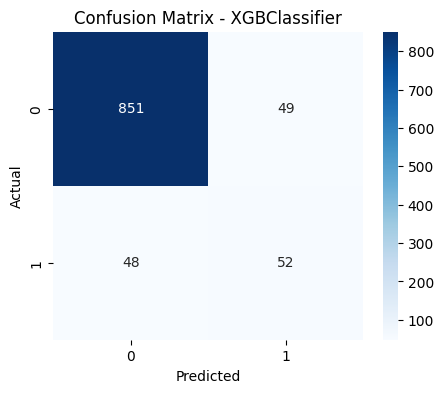

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       900
           1       0.55      0.53      0.54       100

    accuracy                           0.91      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.91      0.91      0.91      1000

Confusion Matrix:
 [[856  44]
 [ 47  53]]


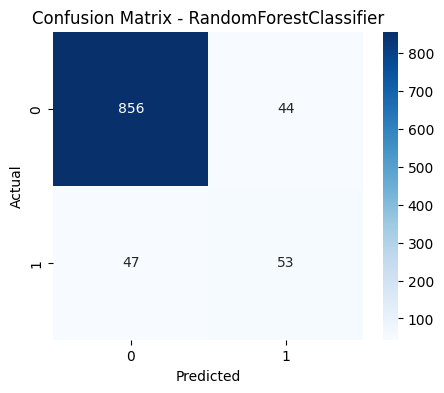

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       900
           1       0.36      0.62      0.45       100

    accuracy                           0.85      1000
   macro avg       0.66      0.75      0.68      1000
weighted avg       0.89      0.85      0.87      1000

Confusion Matrix:
 [[789 111]
 [ 38  62]]


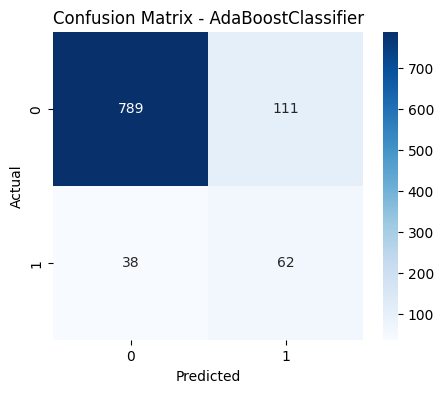

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       900
           1       0.44      0.61      0.51       100

    accuracy                           0.88      1000
   macro avg       0.70      0.76      0.72      1000
weighted avg       0.90      0.88      0.89      1000

Confusion Matrix:
 [[822  78]
 [ 39  61]]


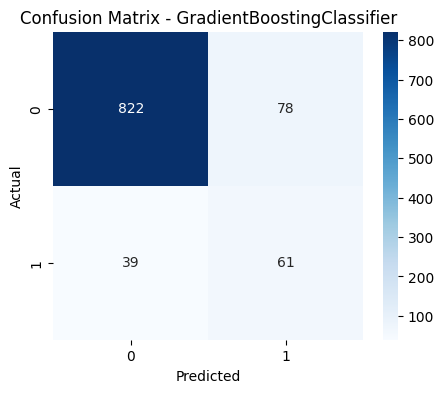

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       900
           1       0.47      0.49      0.48       100

    accuracy                           0.89      1000
   macro avg       0.70      0.71      0.71      1000
weighted avg       0.90      0.89      0.89      1000

Confusion Matrix:
 [[844  56]
 [ 51  49]]


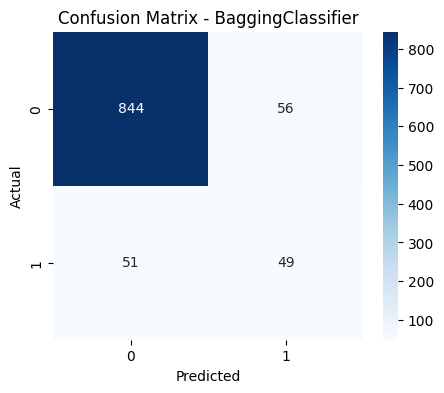

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       900
           1       0.34      0.47      0.39       100

    accuracy                           0.85      1000
   macro avg       0.64      0.68      0.65      1000
weighted avg       0.88      0.85      0.86      1000

Confusion Matrix:
 [[807  93]
 [ 53  47]]


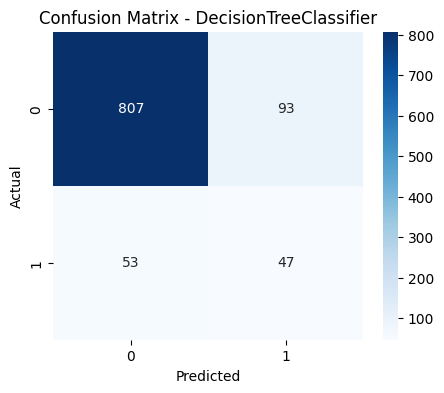

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.86       900
           1       0.28      0.77      0.41       100

    accuracy                           0.78      1000
   macro avg       0.62      0.77      0.63      1000
weighted avg       0.90      0.78      0.82      1000

Confusion Matrix:
 [[699 201]
 [ 23  77]]


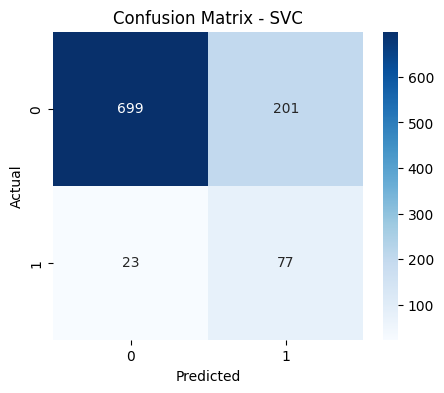

In [32]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()